## Q7

Accuracy: 1.0


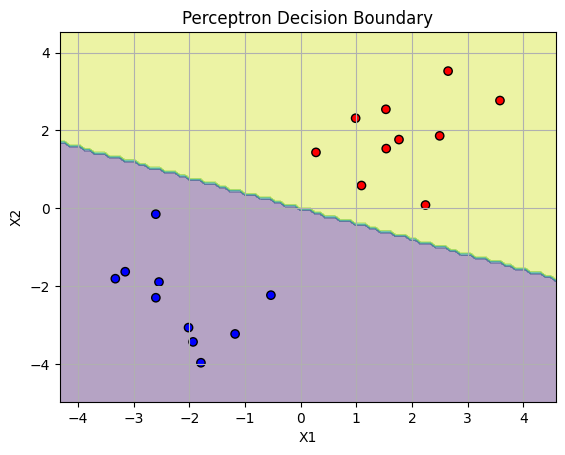

In [1]:
# Q7: Perceptron Learning Algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Loading CSV file
data = pd.read_csv('/content/drive/MyDrive/A4_P1_7c6961dc-3028-4a96-bfd9-7fd871dc7520.csv')
X = data[['X1', 'X2']].values
y = data['y'].values

#Step activation
def step(x):
    return np.where(x >= 0, 1, 0)

#Perceptron class
class Perceptron:
    def __init__(self, lr=0.01, n_iters=20):
        self.lr = lr
        self.n_iters = n_iters

    def fit(self, X, y):
        np.random.seed(42)
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iters):
            for xi, target in zip(X, y):
                y_pred = step(np.dot(xi, self.weights) + self.bias)
                update = self.lr * (target - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        return step(np.dot(X, self.weights) + self.bias)

#Training model
model = Perceptron()
model.fit(X, y)
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

# Plotting decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Perceptron Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


## Q8

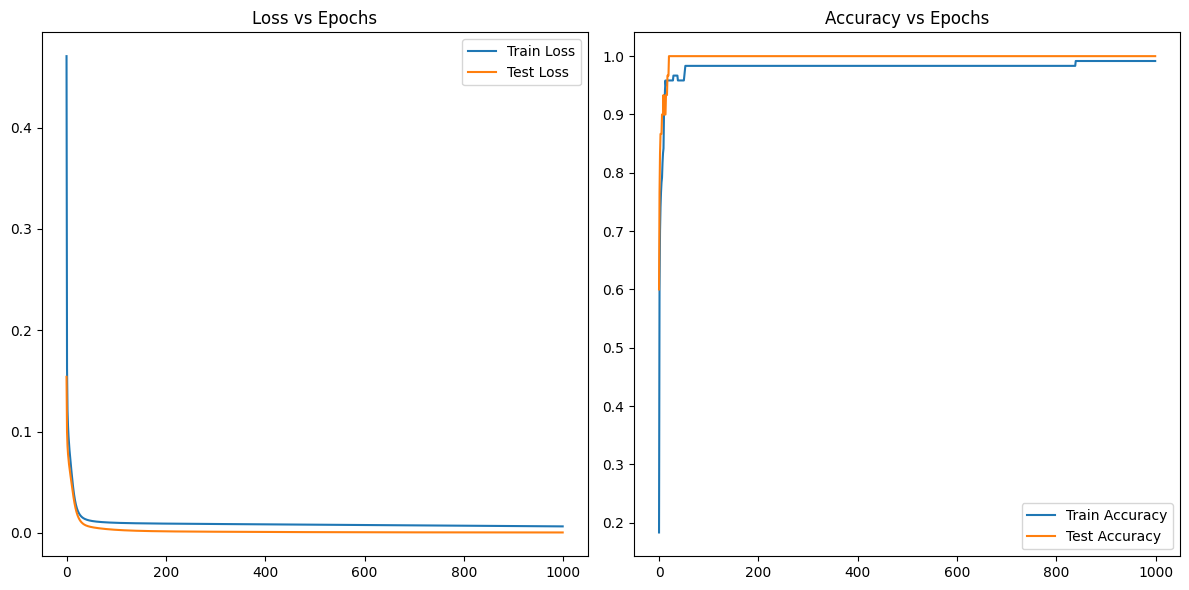

In [2]:
# Q8: Neural Network from Scratch (Iris)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading and preprocessing Iris data
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

#One-hot encode labels
y_onehot = np.zeros((y.size, y.max()+1))
y_onehot[np.arange(y.size), y] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

#Initialize weights and biases
np.random.seed(42)
input_dim, hidden_dim, output_dim = 4, 5, 3
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))
lr = 0.01
epochs = 1000

#Activation functions
def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x) ** 2
def softmax(x): return np.exp(x - x.max(axis=1, keepdims=True)) / np.sum(np.exp(x - x.max(axis=1, keepdims=True)), axis=1, keepdims=True)
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)

train_loss, test_loss, train_acc, test_acc = [], [], [], []

for epoch in range(epochs):
    # Forward
    z1 = X_train @ W1 + b1
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)

    train_loss.append(mse(y_train, a2))
    train_acc.append(np.mean(np.argmax(a2, axis=1) == np.argmax(y_train, axis=1)))

    # Backward
    dz2 = a2 - y_train
    dW2 = a1.T @ dz2
    db2 = dz2.sum(axis=0, keepdims=True)
    dz1 = dz2 @ W2.T * tanh_derivative(z1)
    dW1 = X_train.T @ dz1
    db1 = dz1.sum(axis=0, keepdims=True)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Test forward
    a1_test = tanh(X_test @ W1 + b1)
    a2_test = softmax(a1_test @ W2 + b2)
    test_loss.append(mse(y_test, a2_test))
    test_acc.append(np.mean(np.argmax(a2_test, axis=1) == np.argmax(y_test, axis=1)))

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title("Loss vs Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title("Accuracy vs Epochs")
plt.legend()
plt.tight_layout()
plt.show()
